# การนำเข้าข้อมูลราคาหุ้นไทย

การนำเข้าข้อมูลราคาหุ้นไทยจากเว็บไซต์ finance.yahoo.com

โดยใช้ Yahoo Finance API:(ผ่าน module yfinance)

**ข้อจำกัดคือ** 
   
   ใช้ผ่าน Public API(ไม่มีการตรวจสอบสิทธิ์)  จะถูกจำกัดไว้ที่ 2,000 คำขอต่อชั่วโมงต่อ IP ดังนั้นได้สูงสุด 48,000 คำขอต่อวัน

# install yfinance 

โดยใช้คำสั่ง pip install yfinance 



In [1]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.4 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [2]:
import yfinance as yf

In [15]:
import numpy as np

# การดึงข้อมูลหุ้นของไทย

ระบุชื่อ(quote) ของหุ้น ตามด้วย .BK เช่น

ตัวอย่าง การดึงข้อมูลหุ้นธนาคารไทยพาณิชย์ ชื่อคือ SCB ตั้งแต่วันที่ 1 ม.ค. 2022 ถึง 30 เม.ย. 2022

#**โจทย์สำหรับการจัดดำเนินการข้อมูล**

In [3]:
!pip install --upgrade pandas-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 109 kB 37.0 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0


###1. เก็บข้อมูลใส่ในไฟล์ ให้นักศึกษาดึงข้อมูลในช่วงวันที่ 1 มิ.ย. 2022 ถึง 31 ส.ค. 2022 ของหุ้น 3 ตัวดังต่อไปนี้  TRUE, AH, PTT 

###โดยใช้ชื่อหุ้นที่ระบุในคำสั่งคือ TRUE.BK, AH.BK และ PTT.BK ตามลำดับ

In [11]:
STOCK = ['TRUE.BK','AH.BK','PTT.BK']
import calendar
import pandas as pd
import pandas_datareader.data as web 
import datetime as dt


START_PERIOD = "2022-07-01"
END_PERIOD = dt.datetime.now().strftime("%Y-%m-%d")

hist = web.get_data_yahoo(STOCK,start=START_PERIOD, end=END_PERIOD)
hist = hist.stack()
hist = hist.drop(columns = ['Adj Close'])
hist.to_csv('allStock.csv')

In [13]:
df3 = pd.read_csv("Stock.csv",parse_dates=['Date'], index_col='Date')
df3 = df3.rename(columns={'Symbols':'Stock'})
df3

,Stock,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,,
2022-06-01,TRUE.BK,4.560000,4.560000,4.800000,4.380000,4.380000,4.850103e+08
2022-06-01,AH.BK,23.420000,24.000000,24.299999,23.799999,24.200001,1.091100e+06
2022-06-01,PTT.BK,38.250000,38.250000,38.500000,38.000000,38.000000,5.239500e+07
2022-06-02,TRUE.BK,4.560000,4.560000,4.600000,4.460000,4.540000,1.304976e+08
2022-06-02,AH.BK,23.322416,23.900000,24.500000,23.799999,24.200001,3.034900e+06
2022-06-02,PTT.BK,38.000000,38.000000,38.250000,37.750000,37.750000,3.023040e+07
2022-06-06,TRUE.BK,4.500000,4.500000,4.560000,4.460000,4.560000,9.254240e+07
2022-06-06,AH.BK,23.224833,23.799999,24.400000,23.700001,24.100000,1.937300e+06
2022-06-06,PTT.BK,38.250000,38.250000,38.500000,38.000000,38.000000,3.800310e+07


###2. ให้ทำการ upload file หุ้น 2 ตัวคือ DTAC และ SCG โดยข้อมูลอยู่ในไฟล์ DTAC.csv และ SCG.csv ไฟล์นี้เตรียมไว้ให้แล้วสามารถดึงได้จาก Mango.cmu

In [6]:
from google.colab import files

uploaded = files.upload()

Saving DTAC.csv to DTAC.csv
Saving SCG.csv to SCG.csv


###3.จากไฟล์ราคาหุ้นแต่ละตัว ในที่นี้จะมี 5 ตัว  เราจะพิจารณาค่า column เพียง 5 ค่า ได้แก่ Open, High, Low, Close และ Volume เท่านั้น 

###ให้สร้าง dataFrame เพื่อเก็บข้อมูลสำหรับหุ้นแต่ละตัว โดยเก็บ Open, High, Close และ Volume ที่สูงที่สุดและราคาที่ต่ำที่สุดของ Low ของแต่ละเดือนในช่วง 3 เดือน (เดือน ก.ค., ส.ค. และ ก.ย.) 

###กรณีมีข้อมูลว่างหรือ NaN ให้ข้ามค่าข้อมูลนั้นไปไม่ต้องนำมาเปรียบเทียบ ตัวอย่างข้อมูลใน dataFrame 

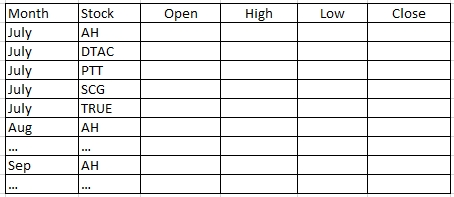

In [14]:
from pandas.tseries.frequencies import month_position_check
import datetime
pd.options.display.max_rows = 999
SCG = pd.read_csv('SCG.csv',parse_dates=['Date'],index_col='Date')
DTAC = pd.read_csv('DTAC.csv',parse_dates=['Date'],index_col='Date')

month_name = []
for i in range(7,10):
  datetime_object = datetime.datetime.strptime(str(i), "%m")
  month_name.append(datetime_object.strftime("%B"))



DTAC['Stock'] = 'DTAC'
SCG['Stock'] = 'SCG'



DTAC = DTAC.loc["2022-07-01" : dt.datetime.now().strftime("%Y-%m-%d")]
SCG = SCG.loc["2022-07-01" : dt.datetime.now().strftime("%Y-%m-%d")]

DTAC = DTAC.reset_index()
SCG = SCG.reset_index()

DTAC = DTAC.drop(columns = ['Change','%Change','Value'])
SCG = SCG.drop(columns = ['Change','%Change','Value'])
col_to_move = DTAC.pop('Stock')
DTAC.insert(1,'Stock',col_to_move)
col_to_move = SCG.pop('Stock')
SCG.insert(1,'Stock',col_to_move)
SCG.to_csv('allStock.csv', mode='a', index=False, header=False)
DTAC.to_csv('allStock.csv', mode='a', index=False, header=False)
data_all = pd.read_csv('allStock.csv',parse_dates=['Date'],index_col='Date')

data_all = data_all.rename(columns={'Symbols':'Stock'})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.


In [16]:
data_all2 = data_all.reset_index()
month = []
data_all2['Date'] = data_all2['Date'].astype(np.datetime64)
for i in range(len(data_all2)):
  datetime_object = datetime.datetime.strptime(str((data_all2['Date'][i].month)), "%m")
  month.append(datetime_object.strftime("%B"))

In [17]:
data_all2['month']= month
data_all2["Volume"] = data_all2["Volume"].map(lambda x: x.replace(',','')).astype(float)

In [18]:
data_3 = data_all2.groupby(['month','Stock']).agg(
    Open = ('Open','max'),
    High = ('High','max'),
    Low=('Low', 'min'),
    Close=('Close','max'),
    Volume=('Volume','max')
    )
data_3['Volume'] = data_3['Volume'].astype(str)
data_3

Open       High    Low  Close        Volume
month     Stock                                                    
August    AH.BK    24.500000  25.500000  21.00  25.25     7495000.0
          DTAC     39.250000  39.500000  28.75  38.75    50544199.0
          PTT.BK   37.750000  38.250000  34.50  38.00    96869700.0
          SCG       4.860000   4.900000   3.98   4.90      368748.0
          TRUE.BK   5.000000   5.050000   4.44   5.00   369917300.0
July      AH.BK    21.799999  21.799999  19.40  21.50     1184400.0
          DTAC     39.000000  39.750000  29.25  38.25   118982539.0
          PTT.BK   34.750000  35.000000  33.00  34.75    73502900.0
          SCG       4.880000   4.900000   4.00   4.86      218703.0
          TRUE.BK   4.860000   4.960000   4.26   4.86  1333730700.0
September AH.BK    29.500000  31.500000  24.60  31.50    15857352.0
          DTAC     37.500000  39.750000  29.00  39.25    23885383.0
          PTT.BK   37.250000  37.500000  36.25  37.25    68865000.0
          SCG       4.900000   4.900000   3.98   4.84       58975.0
          TRUE.BK   4.760000   4.800000   4.48   4.80   139063700.0

###4. จากหุ้นทั้ง 5 ตัวให้ทำการเปรียบเทียบจำนวนการซื้อขาย(Volume) ในแต่ละวันของเดือนสิงหาคม จากนั้นแสดงชื่อหุ้นที่มี**จำนวนการซื้อขาย**มากที่สุดของวันนั้นๆ

ผลลัพธ์ที่ต้องแสดงคือ วันที่    ชื่อหุ้น   จำนวนการซื้อขายที่มากที่สุด (1 วันจะมีเพียง 1 หุ้น) โดยเรียงวันที่ในเดือนสิงหาคม

In [19]:
data_august = data_all.loc["2022-08-01" : "2022-08-31"]
data_august = data_august.drop(columns=['Close','High','Open','Low'])
data_august["Volume"] = data_august["Volume"].map(lambda x: x.replace(',','')).astype(float)

data_august.groupby('Date').max()

,Stock,Volume
Date,,
2022-08-01,TRUE.BK,112563500.0
2022-08-02,TRUE.BK,366320500.0
2022-08-03,TRUE.BK,369917300.0
2022-08-04,TRUE.BK,125071900.0
2022-08-05,TRUE.BK,366377200.0
2022-08-07,SCG,17348133.0
2022-08-08,TRUE.BK,180953800.0
2022-08-09,TRUE.BK,143841700.0
2022-08-10,TRUE.BK,149995500.0


###5. สร้าง dataFrame เพื่อเก็บผลต่างระหว่างค่า Open และ Close คือคำนวณ (Open-Close) ของหุ้นแต่ละตัวในแต่ละวัน(ทั้ง 3 เดือน) กรณี**ไม่มีค่าใดค่าหนึ่ง** ไม่มีค่า Open หรือค่า Close

###เมื่อสั่งพิมพ์ dataFrame จะแสดงข้อมูลดังนี้(**กำหนด format ของวันเดือนปีตามภาพ**) 
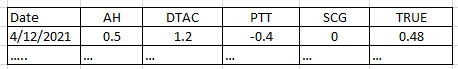



In [20]:
data_diff = data_all2.pivot(index='Date',columns='Stock').drop(columns= ['High','Low','Volume','month'])
data_diff = (data_diff['Open']-data_diff['Close'])
data_diff = data_diff.reset_index()
data_diff['Date']= data_diff['Date'].dt.strftime('%-d/%-m/%Y')
data_diff.set_index('Date')

Stock,AH.BK,DTAC,PTT.BK,SCG,TRUE.BK
Date,,,,,
1/7/2022,0.299999,NaN,-0.25,NaN,-0.06
4/7/2022,0.199999,NaN,0.25,NaN,-0.02
5/7/2022,0.900002,NaN,-0.25,NaN,0.10
6/7/2022,0.000000,NaN,0.00,NaN,0.00
7/7/2022,-0.199999,0.00,-0.75,0.02,-0.10
8/7/2022,0.299999,NaN,0.25,NaN,0.04
9/7/2022,NaN,0.75,NaN,0.02,NaN
11/7/2022,0.400000,NaN,0.25,NaN,-0.04
12/7/2022,0.000000,NaN,0.00,NaN,0.06


###6. จากผลลัพธ์ข้อ 5 ให้สร้าง dataFrame ที่เปลี่ยนค่าผลต่างไปเป็นคำว่า up, down หรือ same ในกรณีที่ค่าผลต่างเป็นบวก, ลบ หรือ 0 ตามลำดับ ถ้าค่าคือ NaN ให้แสดงเป็น NaN

###7. สร้าง dataFrame เพื่อเก็บค่าเฉลี่ยของ Open และ Close ในแต่ละเดือนของหุ้น TRUE และหุ้น SCG
###ถ้าข้อมูลเป็น NaN จะ**ไม่**นำมารวมในการหาค่าเฉลี่ย

###8. สร้าง dataFrame เพื่อเก็บค่า Open กับ Close ของหุ้น DTAC และนับจำนวนของวันที่มีค่าราคาเปิด Open สูงกว่าราคาปิด Close **จากนั้นแสดงค่าจำนวนวันที่นับได้**

###9.แสดงกราฟเส้นของราคาสูงสุด(High) และราคาต่ำสุด(Low) ของหุ้น TRUE และ SCG ในช่วงวันที่ 15-30 ส.ค. 2022  

###ลักษณะของกราฟเส้นคือ แกน x จะเป็นวันที่  แกน y จะเป็นราคา และมีเส้นกราฟทั้งหมด 4 เส้น โดย TRUE มี 2 เส้นคือ High และ Low ขณะที่ SCG ก็มี 2 เส้นคือ High และ Low เช่นกัน

###10.แสดงกราฟเส้นของราคาเปิด(Open) และราคาปิด(Close) ของหุ้น AH ในแต่ละวันของเดือนสิงหาคม สำหรับกรณี NaN ให้แสดงค่าเป็น 0 

### ลักษณะของกราฟจะประกอบด้วยแกน x แสดงข้อมูลวันที่ และแกน y แสดงราคา โดยแต่ละวันจะมีกราฟแท่ง 2 แท่งซึ่ง แท่งแรกแสดงราคาเปิด แท่งที่สองแสดงราคาปิด

